In [2]:
import pandas as pd

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import wordcloud 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [2]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [3]:
df=pd.read_csv('twitter_validation.csv')
df

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
df=df.rename(columns={df.columns[0]: 'Id',df.columns[1]: 'Source',  df.columns[2]: 'Nature',df.columns[3]: 'Text'})
df=df.head(500)
df

,Id,Source,Nature,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
495,6787,Fortnite,Irrelevant,Dumb Lucky☘️ (Fortnite Montage) youtu.be/psW...
496,3838,Cyberpunk2077,Positive,Dang there goes my birthday present but maybe ...
497,2008,CallOfDuty,Irrelevant,It was ab fab seeing the 6 bungalows built in ...
498,4096,CS-GO,Neutral,1.7 million viewers? wtf? and cs:go has more t...


In [8]:
fsen=[]
fval=[]
femo=[]
for i in df['Text']:
    
    #print(cleaned_text)
    lower_case = i.lower()
    cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
    
    #remove stop words
    tokenized_words = word_tokenize(cleaned_text, "english")
    final_words = []
    for word in tokenized_words:
        if word not in stopwords.words('english'):
            final_words.append(word)
            
            
    #remove lemma words
    lemma_words = []
    for word in final_words:
        word = WordNetLemmatizer().lemmatize(word)
        lemma_words.append(word)
    
    #len grater than 2
    h=[]
    for ir in lemma_words:
        if len(ir)>2:
            h.append(ir)
    
    #remove http and RT
    h1 = [word for word in h
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    
    #remove ...
    h2=[]
    for i in h1:
        if '...' not in i:
            h2.append(i)
    
    #concat agian as a single string
    f1=''
    for i in h2:
        f1=f1+' '+i
    print(f1)
    
    
            
    
    score = SentimentIntensityAnalyzer().polarity_scores(f1)
    print(score)
    
    
    if score['neg'] > score['pos']:
        val='Negative'
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        val='positive'
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")
        val='Neutral'
        
    fsen.append(f1)
    fval.append(val)
    
    
    
    emotion_labels = emotion(f1)
    emo=emotion_labels[0]['label']
    print(emo)
    femo.append(emo)
    
    
        

 bbc news amazon bos jeff bezos reject claim company acted like drug dealer bbccouknewsavbusine…
{'neg': 0.151, 'neu': 0.615, 'pos': 0.235, 'compound': 0.128}
Positive Sentiment
neutral
 microsoft pay word function poorly samsungus chromebook
{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.1027}
Negative Sentiment
disapproval
 csgo matchmaking full closet hacking truly awful game
{'neg': 0.252, 'neu': 0.504, 'pos': 0.244, 'compound': -0.0258}
Negative Sentiment
disgust
 president slapping american face really commit unlawful act acquittal discover google vanityfaircomnews202002t…
{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.3597}
Positive Sentiment
neutral
 eahelp madeleine mccann cellar past year little sneaky thing escaped whilst loading fifa point took card use paypal account working help resolve please
{'neg': 0.057, 'neu': 0.674, 'pos': 0.269, 'compound': 0.7178}
Positive Sentiment
caring
 thank eamaddennfl new austin hooper orange brown brown austinhooper18 pict

surprise
 never popped ice block hearthstone pictwittercombcszlhjhpf
{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.3412}
Positive Sentiment
neutral
 mean johnson johnson suppressed report asbestos contamination talc product decade wonder many died birx say randomized controlled study show evidence improved outcome hcq liar youtube77tmszubru4
{'neg': 0.216, 'neu': 0.688, 'pos': 0.097, 'compound': -0.5859}
Negative Sentiment
surprise
 addicted call duty mobile😅
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Neutral Sentiment
neutral
 could wellor horribly wrong
{'neg': 0.765, 'neu': 0.235, 'pos': 0.0, 'compound': -0.7579}
Negative Sentiment
fear
 yesterday decided back overwatch forgot much loved playing want play nothing else mean event atm got get pharah skin ana already
{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.8126}
Positive Sentiment
love
 pubgsupport hiya whenll fixing console game asking lot satisfied lack response wondering lagouts part game like red 

admiration
 leaked memo excoriates facebook slapdash haphazard response global political manipulation dlvritrgbzjd
{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.5423}
Negative Sentiment
neutral
 look kinda clean
{'neg': 0.0, 'neu': 0.454, 'pos': 0.546, 'compound': 0.3415}
Positive Sentiment
approval
 wilson
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Neutral Sentiment
neutral
 flip fuck cyklon30001189 joined kingdom mixer mixercomdeduke mixerpartner mixer streamer xbox callofduty
{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.5423}
Negative Sentiment
neutral
 blizzardcs try buy overwatch credit debit load say something went wrong select another payment method try later help trying hour
{'neg': 0.122, 'neu': 0.669, 'pos': 0.209, 'compound': 0.296}
Positive Sentiment
neutral
 verizon waive data overage charge tough folk
{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.128}
Negative Sentiment
neutral
 one buy battlefield steam app literally run google searc

love
 nigeria national team ranked 29th best team world 3rd africa latest fifa world ranking 🇳🇬🦅 first time team made top since may 2013 kano nigeria instagramcompcfpzvton8ab…
{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.7184}
Positive Sentiment
neutral
 good share check item loving poshmarkapp shopangrykitty poshmark fashion style shopmycloset pier1 leagueoflegends poshmk7zpktuisf9
{'neg': 0.0, 'neu': 0.55, 'pos': 0.45, 'compound': 0.8402}
Positive Sentiment
admiration
 finnish csgo player jamppi sue valve alleged vac ban talkesportbitly3bycjrt
{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.5574}
Negative Sentiment
neutral
 catch xbox game podcast right intromediagamingcomhomethexbox… one best xbox podcast xbox xboxseriesx xboxseriess
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.6369}
Positive Sentiment
neutral
 git gud 5head sniping community probably
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Neutral Sentiment
neutral
 see get behind explain self 

neutral
 red dead redemption xbox one bitly2wc9cxm videogames
{'neg': 0.417, 'neu': 0.583, 'pos': 0.0, 'compound': -0.6486}
Negative Sentiment
neutral
 playing witcher novigrads quest atmosphere make even excited cyberpunkgame cant wait get night city
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.4939}
Positive Sentiment
excitement
 normally dont put time effort people like show exactly kind people participate rainbow6game since disallowed play irl friend lower ranked smh pictwittercom7aahqxw9cz
{'neg': 0.141, 'neu': 0.5, 'pos': 0.359, 'compound': 0.7906}
Positive Sentiment
neutral
 fortnitegame making storm water retarded thing anyone could come smfh like wan ruin game 🤦‍♂️
{'neg': 0.341, 'neu': 0.545, 'pos': 0.114, 'compound': -0.7184}
Negative Sentiment
neutral
 damn
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4019}
Negative Sentiment
neutral
 totally legal johnson johnson company used super poppy make narcotic popular opioid pill washingtonpostcomgraphics2020…
{'ne

neutral
 good job blizzardent blizzlatam warcraft pictwittercomzyot3flen0
{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}
Positive Sentiment
admiration
 best thing could done mentalhealth delete facebook
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
Positive Sentiment
admiration
 planning spending entire night playing red dead redemption getting stoned absolutely regret
{'neg': 0.406, 'neu': 0.495, 'pos': 0.099, 'compound': -0.7645}
Negative Sentiment
remorse
 pleased announce name referee approved fifa referee committee 2020 international list bondo joshua gobagoba tshepo mokani mositwane tirelo dintwa keabetswe methikga itumeleng woman referee wearebfa congratulation pictwittercomiohpfxl5tp
{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.8625}
Positive Sentiment
neutral
 die honor stfu press bkb
{'neg': 0.386, 'neu': 0.297, 'pos': 0.317, 'compound': -0.1779}
Negative Sentiment
neutral
 awesome bonecakeswith strawberry original maple syrup please ☠️☠

neutral
 shitting non preorder kid twitchtvgreasysunnyvale blackopscoldwar coldwarbeta
{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.4215}
Negative Sentiment
anger
 may gon awesome
{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6249}
Positive Sentiment
excitement
 transvaginal mesh johnson johnson fined 344m deceptive marketing woman theguardiancombusiness2020…
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Neutral Sentiment
neutral
 pic cute
{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}
Positive Sentiment
admiration
 facebook hub fake information
{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}
Negative Sentiment
neutral
 skunkworks johnson johnson rushing develop coronavirus vaccine inquirercombusinessdrugs… via phillyinquirer
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Neutral Sentiment
neutral
 gon say overwatch essentially nominated lgbtq game year worse rise skywalker nominated lgbtq film year least rise skywalker slow 

neutral
 black ops cold war official reveal new trailer thought youtube5ygbjhf96zy via youtube wait bro love video getting hype realthunder402
{'neg': 0.155, 'neu': 0.677, 'pos': 0.167, 'compound': 0.0772}
Positive Sentiment
love
 normal people hate overwatch becouse comunnity toxic one mic 2seconds later trash omfg bed unistall game want people voice chat
{'neg': 0.161, 'neu': 0.783, 'pos': 0.057, 'compound': -0.5267}
Negative Sentiment
anger
 bitch legend vip little brother game win streak smfh ronnie2k nba2k pictwittercomgds3kn9jvj
{'neg': 0.194, 'neu': 0.458, 'pos': 0.348, 'compound': 0.4654}
Positive Sentiment
neutral
 worldcupathome five african match would love see fifa googlehitscomworldcupathome…
{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}
Positive Sentiment
love
 watched nba quiet time actually boycotted year hong kong fiasco damelillard may bring back like fortnite heater
{'neg': 0.267, 'neu': 0.622, 'pos': 0.111, 'compound': -0.5423}
Negative Sentiment
neut

admiration
 parent freak much someone know add facebook😂😂
{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'compound': -0.4404}
Negative Sentiment
amusement
 shipped first gpuenabled production code bravetools lxd make easy passthrough host hardware nvidia driver bravetools abstract configuration make easy automate future release devops opensource githubcombravetoolsbra…
{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.7003}
Positive Sentiment
neutral
 napc come vibe messing around gta twitter twitchtvmilzzzttd
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Neutral Sentiment
neutral
 ps5 look nice love white
{'neg': 0.0, 'neu': 0.3, 'pos': 0.7, 'compound': 0.7906}
Positive Sentiment
love
 jul red dead redemption 3999 amazon ps4 amznto37yuuab amznto2smbhgx
{'neg': 0.331, 'neu': 0.538, 'pos': 0.131, 'compound': -0.5574}
Negative Sentiment
neutral
 news gamesradar retailer emailing customer advise xbox series preorders hono download app applaygames news video game information playgoo

neutral
 hated packing one least sold arrived safelylol resellercommunity flipping thriftshopping thrift goodwill yardsalefinds yardsale garagesale americanpickers ebay amazon sourcing… instagramcompcbbfx5rfqhw…
{'neg': 0.176, 'neu': 0.753, 'pos': 0.071, 'compound': -0.5423}
Negative Sentiment
amusement
 release woltk expansion best one far blizzmilkfat blizzardent warcraft mikemorhaime day7 pictwittercomfgplmastt8
{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.6369}
Positive Sentiment
neutral
 game mutuals pokémon borderland much sims havent played forever tho spiderman ps4 spyro reignited uuuh good either ciaranstrange sasspiria orionsuccs msmarquise8 bleh
{'neg': 0.082, 'neu': 0.802, 'pos': 0.116, 'compound': 0.2177}
Positive Sentiment
neutral
 really really hope microsoft taking away previously multiplatform stuff fucking suck always fucking sucked
{'neg': 0.309, 'neu': 0.525, 'pos': 0.166, 'compound': -0.4615}
Negative Sentiment
anger
 dreamed playing league legend korone 

anger
 happening peasant going war company
{'neg': 0.494, 'neu': 0.506, 'pos': 0.0, 'compound': -0.5994}
Negative Sentiment
neutral
 worst thing pubg banned player knew ban till app shown error playing non social medium watch news pubgmobile
{'neg': 0.475, 'neu': 0.461, 'pos': 0.064, 'compound': -0.9118}
Negative Sentiment
disgust
 ptaofficialpk wanted ban pubg personnel fight pubg corp pls unban game thousand people requested ban game see lakh people requesting unban dont take pubg pride problem imrankhanpubgkholo
{'neg': 0.395, 'neu': 0.57, 'pos': 0.035, 'compound': -0.9222}
Negative Sentiment
neutral
 yup there zombie plague world warcraft shadowlands ifttt30xboyt
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Neutral Sentiment
neutral
 might need business lawyer business threatened lawsuit businesslawyer gta etobicoke
{'neg': 0.38, 'neu': 0.62, 'pos': 0.0, 'compound': -0.5994}
Negative Sentiment
neutral
 nba2k guy got get chris smoove manager commentates real basketball infl

In [9]:
sia = pd.DataFrame(list(zip(fsen,fval)),
               columns =['Sentence', 'Sentiment'])
sia

,Sentence,Sentiment
0,bbc news amazon bos jeff bezos reject claim c...,positive
1,microsoft pay word function poorly samsungus ...,Negative
2,csgo matchmaking full closet hacking truly aw...,Negative
3,president slapping american face really commi...,positive
4,eahelp madeleine mccann cellar past year litt...,positive
...,...,...
495,dumb lucky☘️ fortnite montage youtubepswjtnkb...,Negative
496,dang birthday present maybe better,positive
497,fab seeing bungalow built walsden localitynew...,positive
498,million viewer wtf csgo minecraft fortnite se...,Negative


In [5]:
from transformers import pipeline


2023-01-22 17:29:28.908030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [35]:
emotion_labels = emotion("I'm happy hired")
emotion_labels[0]['label']

'joy'

In [32]:
sent=[]
emot=[]
for i in df["Text"]:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [36]:
sent=[]
emot=[]
for i in df["Text"]:
    emotion_labels = emotion(i)
    emo=emotion_labels[0]['label']
    sent.append(i)
    emot.append(emo)
    
emotion = pd.DataFrame(list(zip(sent,emot)),
               columns =['Sentence', 'Emotion'])
emotion
    

,Sentence,Emotion
0,BBC News - Amazon boss Jeff Bezos rejects clai...,neutral
1,@Microsoft Why do I pay for WORD when it funct...,curiosity
2,"CSGO matchmaking is so full of closet hacking,...",annoyance
3,Now the President is slapping Americans in the...,neutral
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...,curiosity
...,...,...
495,Dumb Lucky☘️ (Fortnite Montage) youtu.be/psW...,neutral
496,Dang there goes my birthday present but maybe ...,excitement
497,It was ab fab seeing the 6 bungalows built in ...,neutral
498,1.7 million viewers? wtf? and cs:go has more t...,curiosity


# new  
emotion=emotion.drop(0)
emotion

In [11]:
df['Text'][0]

"BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…"

In [12]:
df['Text'][1]

'@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄'

In [13]:
df['Text'][2]

"CSGO matchmaking is so full of closet hacking, it's a truly awful game."

In [18]:
df['Text'][3]

'Now the President is slapping Americans in the face that he really did commit an unlawful act after his  acquittal! From Discover on Google vanityfair.com/news/2020/02/t…'

In [37]:
j=emotion['Emotion'].value_counts(sort=False)

In [38]:
j

neutral           143
curiosity          24
annoyance          27
gratitude          14
confusion           6
amusement          18
admiration         57
excitement         37
joy                24
anger              21
approval           22
caring              3
surprise            8
disappointment     13
love               28
fear                7
realization        14
disgust             6
disapproval        15
desire              1
optimism            5
embarrassment       2
sadness             3
remorse             2
Name: Emotion, dtype: int64

In [23]:
print(type(j))

<class 'pandas.core.series.Series'>


In [39]:
j=pd.DataFrame(j)
j=j.drop('neutral')
j

,Emotion
curiosity,24
annoyance,27
gratitude,14
confusion,6
amusement,18
admiration,57
excitement,37
joy,24
anger,21
approval,22


In [40]:
j=j.reset_index()
j

,index,Emotion
0,curiosity,24
1,annoyance,27
2,gratitude,14
3,confusion,6
4,amusement,18
5,admiration,57
6,excitement,37
7,joy,24
8,anger,21
9,approval,22


[Text(0.5, 0, 'Tweet count'), Text(0, 0.5, 'Emotions')]

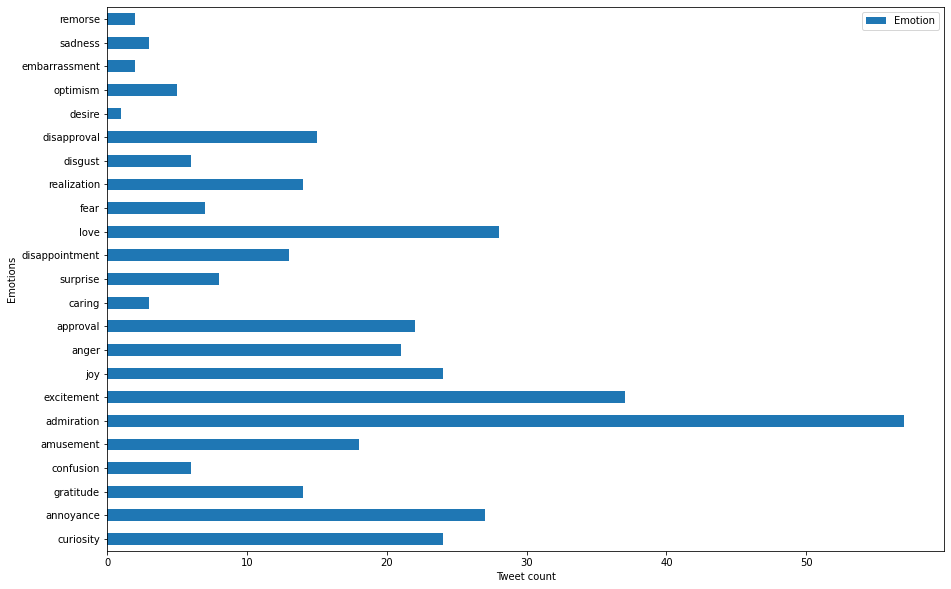

In [41]:

ax = j.plot.barh(x='index', y='Emotion', rot=0,figsize=(15, 10))
ax. set(xlabel="Tweet count", ylabel="Emotions")

In [42]:
import seaborn as sns


Text(0.5, 1.0, 'Emotion Distribution')

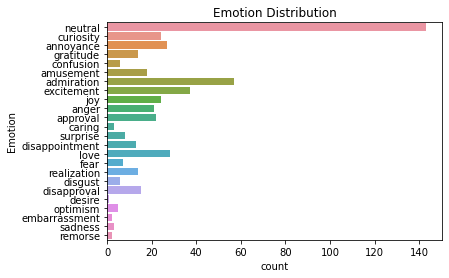

In [43]:
sns.countplot(data = emotion, y = 'Emotion').set_title("Emotion Distribution")


In [44]:
sia

,Sentence,Sentiment
0,bbc news amazon bos jeff bezos reject claim c...,positive
1,microsoft pay word function poorly samsungus ...,Negative
2,csgo matchmaking full closet hacking truly aw...,Negative
3,president slapping american face really commi...,positive
4,eahelp madeleine mccann cellar past year litt...,positive
...,...,...
495,dumb lucky☘️ fortnite montage youtubepswjtnkb...,Negative
496,dang birthday present maybe better,positive
497,fab seeing bungalow built walsden localitynew...,positive
498,million viewer wtf csgo minecraft fortnite se...,Negative


Text(0.5, 1.0, 'Emotion Distribution')

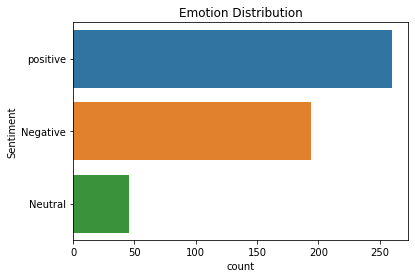

In [45]:
sns.countplot(data = sia, y = 'Sentiment').set_title("Emotion Distribution")


In [46]:
siapos=sia.loc[sia.Sentiment=='positive']
siapos=siapos['Sentence']
siapos

0       bbc news amazon bos jeff bezos reject claim c...
3       president slapping american face really commi...
4       eahelp madeleine mccann cellar past year litt...
5       thank eamaddennfl new austin hooper orange br...
6       rocket league sea thief rainbow six siege🤔 lo...
                             ...                        
491     hehe love thumbnail upcoming microsoft bethes...
492     fifa soar top chart week million player alrea...
494               special shoutouts microsoft excel 2013
496                   dang birthday present maybe better
497     fab seeing bungalow built walsden localitynew...
Name: Sentence, Length: 260, dtype: object

Positive words


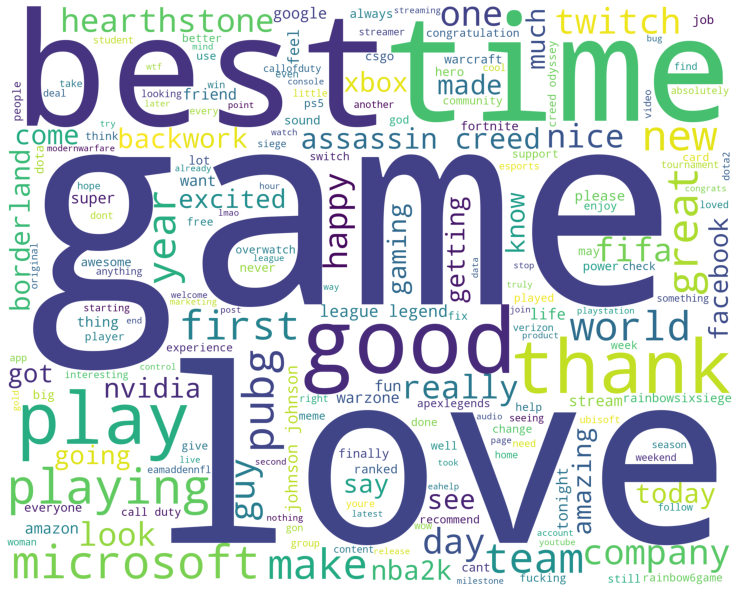

In [47]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(siapos,'white')


In [49]:
sianeg=sia.loc[sia.Sentiment=='Negative']
sianeg=sianeg['Sentence']
sianeg

1       microsoft pay word function poorly samsungus ...
2       csgo matchmaking full closet hacking truly aw...
8       fix jesus please fix world going playstation ...
11      fredtjoseph hey fred comcast cut cable verizo...
13      nba2k game suck second left team intentionall...
                             ...                        
489       ight nba2k false alarm pictwittercomf4gbu2bvkb
490     johnson johnson covid19 vaccine study paused ...
493     ban battlefield player sasobyte occurred see ...
495     dumb lucky☘️ fortnite montage youtubepswjtnkb...
498     million viewer wtf csgo minecraft fortnite se...
Name: Sentence, Length: 194, dtype: object

Negative words


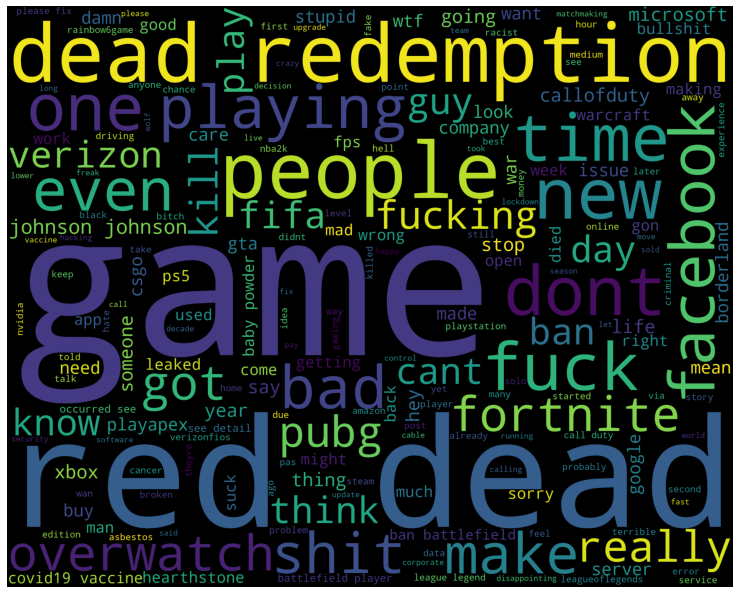

In [50]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Negative words")
wordcloud_draw(sianeg)


In [52]:
sianeu=sia.loc[sia.Sentiment=='Neutral']
sianeu=sianeu['Sentence']
sianeu

10      itching assassinate tccgif assassinscreedblac...
32                   thing would nvidia 3090 unspeakable
42      amazon stop accepting new online grocery cust...
47                            addicted call duty mobile😅
81                                   fuckkkkkk cant wait
84      used voice changer pretended girl csgo match ...
92                                                wilson
101     let fucking goooooooooooooooooooooooooooooooo...
129                   constant mouse clicking always got
138             git gud 5head sniping community probably
155     earned daily quest completed achievement warc...
164                          guy fucking cracked holeeee
177                              thought dis nigga meant
185                        ps5 got fortnite alr rip xbox
194     brand new driver date game still crashing goi...
234     androiddev ive noticed issue upgrading androi...
237     skin revenant look dope greasygamercomthreads...
240                            

Neutral words


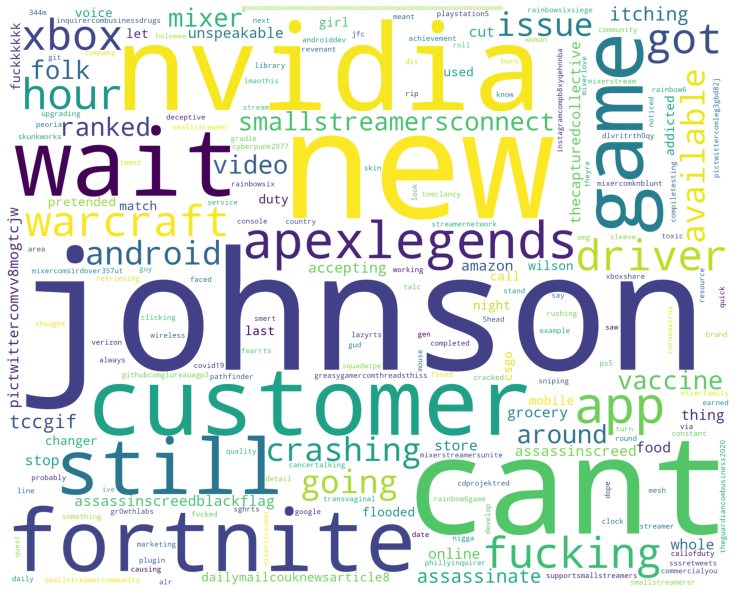

In [53]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Neutral words")
wordcloud_draw(sianeu,'white')

In [54]:
emotion

,Sentence,Emotion
0,BBC News - Amazon boss Jeff Bezos rejects clai...,neutral
1,@Microsoft Why do I pay for WORD when it funct...,curiosity
2,"CSGO matchmaking is so full of closet hacking,...",annoyance
3,Now the President is slapping Americans in the...,neutral
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...,curiosity
...,...,...
495,Dumb Lucky☘️ (Fortnite Montage) youtu.be/psW...,neutral
496,Dang there goes my birthday present but maybe ...,excitement
497,It was ab fab seeing the 6 bungalows built in ...,neutral
498,1.7 million viewers? wtf? and cs:go has more t...,curiosity


In [55]:
sad=emotion.loc[emotion.Emotion=='curiosity']
sad=sad['Sentence']
sad

1      @Microsoft Why do I pay for WORD when it funct...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
28     @Borderlands how do I submit a complaint? Your...
50     @PUBG_Support Hiya! So when'll u be fixing you...
57     Is there anything not wrong with this game why...
71                                            God when 🥺
95     @verizon Can you waive some data overage charg...
180    Normally i dont put time and effort into peopl...
187    First Community ban with 13/11 K/D after killi...
266    why can i hear my little sister arguing with p...
280    @EAHelp Hi was booted from battlefield V game ...
282    @Warcraft Can you explain this bullshit? Thank...
310    What does everyone think of @PlayOverwatch ope...
313    Whos ready for some zombie royale warzone stre...
321    @EAHelp I haven't been able to log on to Battl...
343    My experience with ASSASSIN'S CREED: ODYSSEY\n...
359    My League of Legends started having FPS spikes...
362    Why do parents freak out

sad words


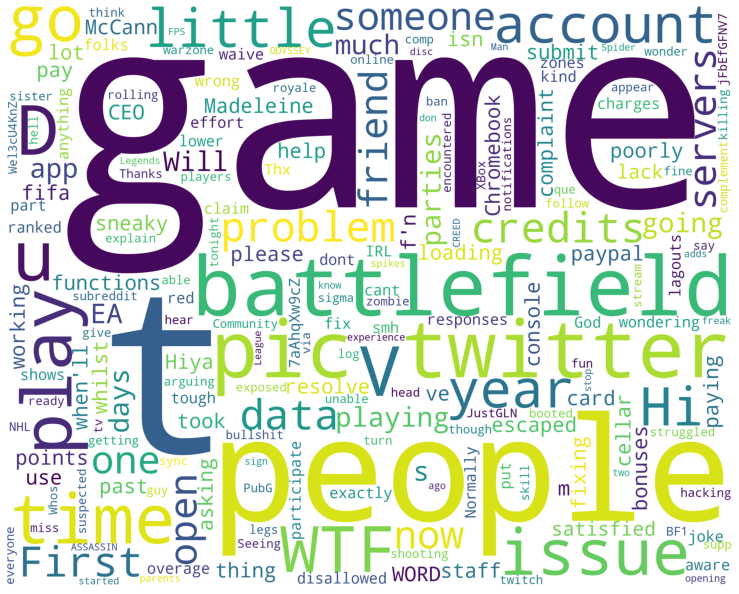

In [94]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("sad words")
wordcloud_draw(sad,'white')

In [6]:
from tkinter import *   
from tkinter import messagebox
from PIL import Image
top = Tk()  
  
top.geometry("500x500")  
  
def pos():  
    
    im = Image.open('pos.png')
    im.show()
    
def neg():  
    
    im = Image.open('neg.png')
    im.show()
    
def neu():  
    
    im = Image.open('neu.png')
    im.show()
    
    
def over():  
    
    im = Image.open('bar.png')
    im.show()
    
    
def emotion():  
    
    im = Image.open('emotion bar.png')
    im.show()





  

b1 = Button(top,text = "Positive",command = pos,activeforeground = "red",activebackground = "pink",pady=10)  
  
b2 = Button(top, text = "Neutral",command = neg,activeforeground = "blue",activebackground = "pink",pady=10)  
  
b3 = Button(top, text = "Negative",command = neu,activeforeground = "green",activebackground = "pink",pady = 10)  
  
    
b4 = Button(top,text = "Overall Analysis",command = over,activeforeground = "red",activebackground = "pink",pady=10)  
  
b5 = Button(top, text = "Emotion Analysis",command = emotion,activeforeground = "blue",activebackground = "pink",pady=10)  

#b6 = Button(top, text = "Negative",command = neu,activeforeground = "green",activebackground = "pink",pady = 10)      
#b4 = Button(top, text = "Yellow",activeforeground = "yellow",activebackground = "pink",pady = 10)  




b1.pack(side = LEFT)  
  
b2.pack(side = LEFT)  
  
b3.pack(side = LEFT)  

b4.pack(side=LEFT)

b5.pack(side=LEFT)


  
#b4.pack(side = LEFT)  
  
b1.place(x=600, y=100)
b2.place(x=690, y=100)
b3.place(x=780, y=100)
b4.place(x=700, y=200)
b5.place(x=700, y=250)

from transformers import pipeline
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')


def replace():
    text = entry.get("1.0",END)
    emotion_labels = emotion(text)
    emo=emotion_labels[0]['label']
    output.insert(END, str(emo))

#Text Variables
enter = StringVar()

#Creating the widgets
l1 = Label(top, text="Enter text:")
entry = Text(top, width=50, height=3, wrap=WORD)
button = Button(top, text="Convert", width=20)
l2 = Label(top, text="Emotion:")
output = Text(top, width=50, height=3, wrap=WORD)

#Positioning the widgets
l1.grid(row=1, column=1, padx=5, sticky=W)
entry.grid(row=2, column=1, columnspan=2, padx=5, pady=(0,10))
button.grid(row=3, column=1, columnspan=2, pady=5)
l2.grid(row=4, column=1, padx=5, sticky=W)
output.grid(row=5, column=1, columnspan=2, padx=5, pady=(0,10))

#Button activation
button.configure(command=replace)





top.mainloop()  


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 